<a href="https://colab.research.google.com/github/ElioChen/CHEM101.6/blob/main/v3_3_0_8_5_D0_5_A20_FC2_0_SC2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create a dictionary to store the energy differences and other information
energy_differences = {}

# Initialize lists to store molecule names and energies
molecules_A = []
energies_A = []
molecules_B = []
energies_B = []
data_A = {}  # Store Distance, Angle X, Angle Y, and other details
data_B = {}

# Helper function to clean up distance/angle parts if they already contain labels
def clean_part(part):
    return part.split(':')[-1].strip()  # Split by ':' and take the last part, stripping any whitespace

# Helper function to parse and format distances and angles to one decimal place, excluding units
def format_distance_or_angle(part):
    # Remove any units like '°' or 'Å' and parse the value
    part_cleaned = part.replace('°', '').replace('Å', '').strip()
    try:
        value = float(part_cleaned)
        return f"{value:.1f}"  # Allow one decimal place
    except ValueError:
        return part

# Load data from energy_final_A.txt
with open('energy_final_A.txt', 'r') as f:
    for line in f:
        # Split the line based on comma
        parts = line.strip().split(',')
        molecules_A.append(parts[0])  # Extract molecule name
        energies_A.append(float(parts[1]))  # Extract energy value

        # Clean and format all remaining parts to remove duplicate labels and format properly
        additional_info = []
        for part in parts[2:]:
            cleaned_part = clean_part(part)
            formatted_value = format_distance_or_angle(cleaned_part)
            additional_info.append(formatted_value)

        data_A[parts[0]] = additional_info

# Load data from energy_final_B.txt
with open('energy_final_B.txt', 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        molecules_B.append(parts[0])  # Extract molecule name
        energies_B.append(float(parts[1]))  # Extract energy value

        additional_info = []
        for part in parts[2:]:
            cleaned_part = clean_part(part)
            formatted_value = format_distance_or_angle(cleaned_part)
            additional_info.append(formatted_value)

        data_B[parts[0]] = additional_info

# Function to convert a list of distances and angles into labeled strings
def create_labeled_info(info_list):
    labeled_parts = []
    labels = [
        "Distance", "Angle X", "Angle Y",
        "S1-S2 bond", "C1-S2 bond", "C2-S1 bond",
        "C1-S1-S2 angle", "S1-S2-C2 angle", "S1-C1-C2 angle",
        "C1-C2-S2 angle", "C1-S1-S2-C2 dihedral"
    ]
    # Iterate over the info list and add labels
    for idx, value in enumerate(info_list):
        if idx < len(labels):
            formatted_value = format_distance_or_angle(value)
            labeled_parts.append(f"{labels[idx]}: {formatted_value}")
        else:
            labeled_parts.append(value)  # For any extra info, keep it as is
    return ', '.join(labeled_parts)

# Iterate through molecules in B
for i, molecule in enumerate(molecules_B):
    if molecule in molecules_A:
        # Calculate the energy difference
        energy_diff = float(energies_B[i] - energies_A[molecules_A.index(molecule)]) * 627.5
        energy_differences[molecule] = energy_diff

# Save the energy differences and other information to delta_energy.txt
with open('delta_energy.txt', 'w') as f:
    for molecule, diff in energy_differences.items():
        if molecule in data_A:
            info_list = data_A[molecule]
            # Convert the list into a formatted string with labels similar to your example
            additional_info_str = create_labeled_info(info_list)
            # Write each molecule's information on a new line, including formatted distance/angle details
            f.write(f'{molecule}, {diff:.12f}, {additional_info_str}\n')


In [2]:
import csv

# Create a dictionary to store the energy differences and other information
energy_differences = {}

# Initialize lists to store molecule names and energies
molecules_A = []
energies_A = []
molecules_B = []
energies_B = []
data_A = {}  # Store Distance, Angle X, Angle Y, and other details
data_B = {}

# Helper function to clean up distance/angle parts if they already contain labels
def clean_part(part):
    return part.split(':')[-1].strip()  # Split by ':' and take the last part, stripping any whitespace

# Helper function to parse and format distances and angles to one decimal place, excluding units
def format_distance_or_angle(part):
    # Remove any units like '°' or 'Å' and parse the value
    part_cleaned = part.replace('°', '').replace('Å', '').strip()
    try:
        value = float(part_cleaned)
        return f"{value:.1f}"  # Allow one decimal place
    except ValueError:
        return part

# Load data from energy_final_A.txt
with open('energy_final_A.txt', 'r') as f:
    for line in f:
        # Split the line based on comma
        parts = line.strip().split(',')
        molecules_A.append(parts[0])  # Extract molecule name
        energies_A.append(float(parts[1]))  # Extract energy value

        # Clean and format all remaining parts to remove duplicate labels and format properly
        additional_info = []
        for part in parts[2:]:
            cleaned_part = clean_part(part)
            formatted_value = format_distance_or_angle(cleaned_part)
            additional_info.append(formatted_value)

        data_A[parts[0]] = additional_info

# Load data from energy_final_B.txt
with open('energy_final_B.txt', 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        molecules_B.append(parts[0])  # Extract molecule name
        energies_B.append(float(parts[1]))  # Extract energy value

        additional_info = []
        for part in parts[2:]:
            cleaned_part = clean_part(part)
            formatted_value = format_distance_or_angle(cleaned_part)
            additional_info.append(formatted_value)

        data_B[parts[0]] = additional_info

# Iterate through molecules in B
for i, molecule in enumerate(molecules_B):
    if molecule in molecules_A:
        # Calculate the energy difference
        energy_diff = (energies_B[i] - energies_A[molecules_A.index(molecule)]) * 627.5
        energy_differences[molecule] = energy_diff

# Save the energy differences and other information to delta_energy.csv
with open('delta_energy.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the specified header row
    csv_writer.writerow([
        "molecule_index", "energy", "Distance", "Angle X", "Angle Y",
        "S1-S2 bond", "C1-S2 bond", "C2-S1 bond", "C1-S1-S2 angle",
        "S1-S2-C2 angle", "S1-C1-C2 angle", "C1-C2-S2 angle",
        "C1-S1-S2-C2 dihedral"
    ])

    # Write each molecule's information as a new row
    for molecule, diff in energy_differences.items():
        if molecule in data_A:
            info_list = data_A[molecule]
            # Ensure all 11 extra data points are used as per the standard output format
            row_data = [molecule, f"{diff:.12f}"] + info_list[:11]
            # Write the row to CSV
            csv_writer.writerow(row_data)


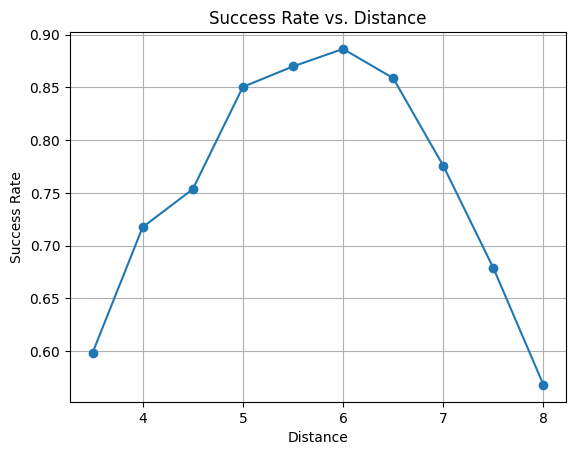

In [3]:
# prompt: 计算并绘图energy_final_B.txt中的Distance的成功率。即每个distance出现的次数除以49.

import csv
import matplotlib.pyplot as plt

# Read data from delta_energy.csv
distances = []
with open('delta_energy.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        distances.append(float(row['Distance']))

# Count the occurrences of each distance
distance_counts = {}
for distance in distances:
    if distance in distance_counts:
        distance_counts[distance] += 1
    else:
        distance_counts[distance] = 1

# Calculate success rate for each distance
success_rates = {}
total_attempts = 361  # Assuming 361 total attempts for each distance
for distance, count in distance_counts.items():
    success_rates[distance] = count / total_attempts

# Sort distances and success rates for plotting
sorted_distances = sorted(success_rates.keys())
sorted_success_rates = [success_rates[distance] for distance in sorted_distances]

# Plot the success rate vs. distance
plt.plot(sorted_distances, sorted_success_rates, marker='o')
plt.xlabel('Distance')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Distance')
plt.grid(True)
plt.show()

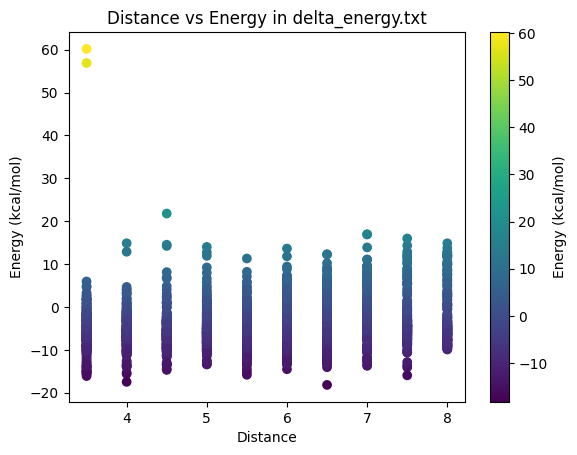

In [4]:
import matplotlib.pyplot as plt

distances = []
energies = []

# Open delta_energy.txt and process each line
with open('delta_energy.txt', 'r') as f:
    for line in f:
        parts = line.split(',')

        if len(parts) >= 4:  # Ensure there are enough parts to extract data
            try:
                # Extract distance from the third element (removing 'Distance: ' part)
                distance = float(parts[2].split(':')[1].strip())

                # Extract energy from the second element
                energy = float(parts[1].strip())

                # Append the distance and energy to their respective lists
                distances.append(distance)
                energies.append(energy)

            except ValueError:
                print(f"Invalid distance or energy value in line: {line}")

# Create a scatter plot with color representing frequency
plt.scatter(distances, energies, c=energies, cmap='viridis')
plt.xlabel('Distance')
plt.ylabel('Energy (kcal/mol)')
plt.title('Distance vs Energy in delta_energy.txt')
plt.colorbar(label='Energy (kcal/mol)')  # Add a colorbar to show the energy scale
plt.show()


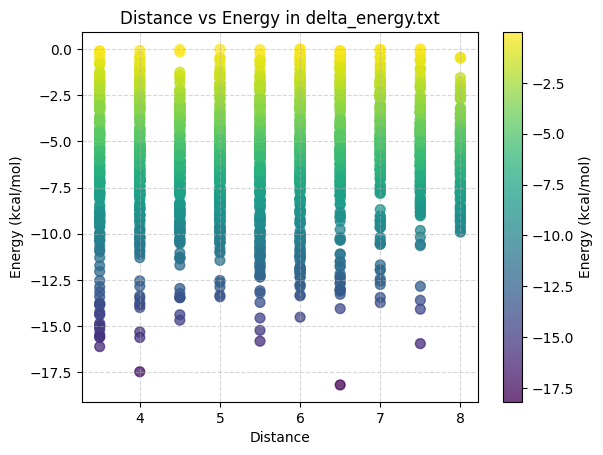

In [5]:
import matplotlib.pyplot as plt

distances = []
energies = []

# Open delta_energy.txt and process each line
with open('delta_energy.txt', 'r') as f:
    for line in f:
        parts = line.split(',')

        if len(parts) >= 4:  # Ensure there are enough parts to extract data
            try:
                # Extract distance from the third element (removing 'Distance: ' part)
                distance_str = parts[2].split(':')[1].strip()
                distance = float(distance_str)

                # Extract energy from the second element
                energy = float(parts[1].strip())

                # Append the distance and energy to their respective lists
                if energy < 0 and energy > -20:
                  distances.append(distance)
                  energies.append(energy)

            except (ValueError, IndexError):
                print(f"Invalid distance or energy value in line: {line}")

# Create a scatter plot with color representing energy
plt.scatter(distances, energies, c=energies, cmap='viridis', s=50, alpha=0.75)
plt.xlabel('Distance')
plt.ylabel('Energy (kcal/mol)')
plt.title('Distance vs Energy in delta_energy.txt')
plt.colorbar(label='Energy (kcal/mol)')  # Add a colorbar to show the energy scale
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.show()


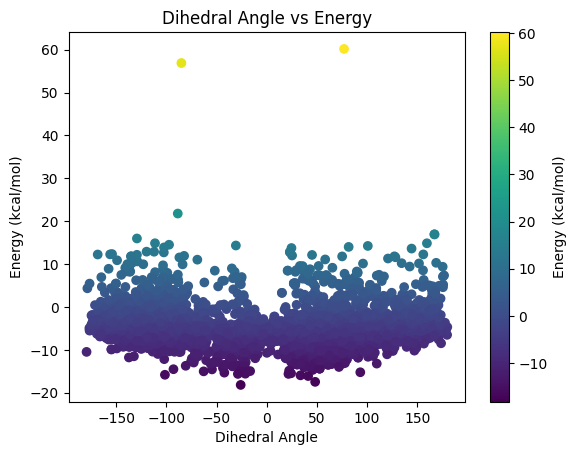

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the delta_energy.csv file into a pandas DataFrame
df = pd.read_csv('delta_energy.csv')

# Assuming "C1-S1-S2-C2 dihedral" is the column name for dihedral angles
dihedral_column = 'C1-S1-S2-C2 dihedral'
energy_column = 'energy'

# Convert the energy column to numerical values (assuming it's a string)
df[energy_column] = pd.to_numeric(df[energy_column], errors='coerce')

# Create the scatter plot
plt.scatter(df[dihedral_column], df[energy_column], c=df[energy_column], cmap='viridis')
plt.xlabel('Dihedral Angle')
plt.ylabel('Energy (kcal/mol)')
plt.title('Dihedral Angle vs Energy')
plt.colorbar(label='Energy (kcal/mol)')  # Add a colorbar to show the energy scale
plt.show()

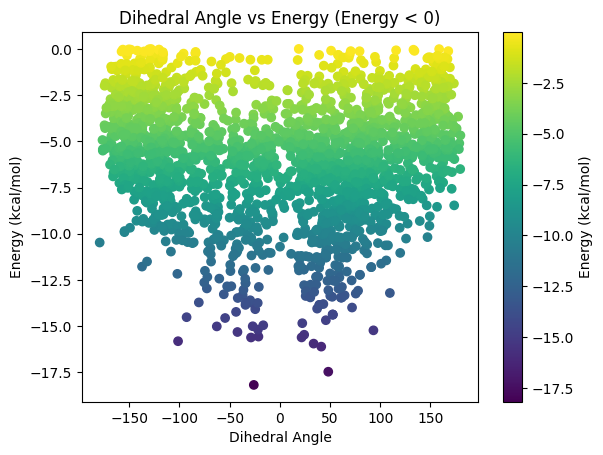

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the delta_energy.csv file into a pandas DataFrame
df = pd.read_csv('delta_energy.csv')

# Assuming "C1-S1-S2-C2 dihedral" is the column name for dihedral angles
dihedral_column = 'C1-S1-S2-C2 dihedral'
energy_column = 'energy'

# Convert the energy column to numerical values (assuming it's a string)
df[energy_column] = pd.to_numeric(df[energy_column], errors='coerce')

# Filter the DataFrame to include only rows where the energy is less than 0
df_filtered = df[df[energy_column] < 0]

# Create the scatter plot
plt.scatter(df_filtered[dihedral_column], df_filtered[energy_column], c=df_filtered[energy_column], cmap='viridis')
plt.xlabel('Dihedral Angle')
plt.ylabel('Energy (kcal/mol)')
plt.title('Dihedral Angle vs Energy (Energy < 0)')
plt.colorbar(label='Energy (kcal/mol)')  # Add a colorbar to show the energy scale
plt.show()


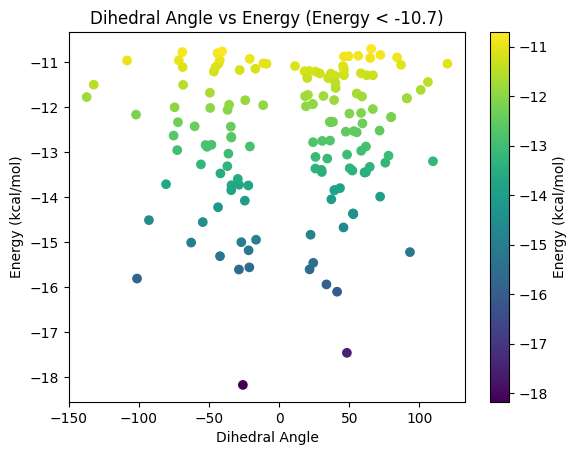

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the delta_energy.csv file into a pandas DataFrame
df = pd.read_csv('delta_energy.csv')

# Assuming "C1-S1-S2-C2 dihedral" is the column name for dihedral angles
dihedral_column = 'C1-S1-S2-C2 dihedral'
energy_column = 'energy'

# Convert the energy column to numerical values (assuming it's a string)
df[energy_column] = pd.to_numeric(df[energy_column], errors='coerce')

# Filter the DataFrame to include only rows where the energy is less than 0
df_filtered = df[df[energy_column] < -10.7]

# Create the scatter plot
plt.scatter(df_filtered[dihedral_column], df_filtered[energy_column], c=df_filtered[energy_column], cmap='viridis')
plt.xlabel('Dihedral Angle')
plt.ylabel('Energy (kcal/mol)')
plt.title('Dihedral Angle vs Energy (Energy < -10.7)')
plt.colorbar(label='Energy (kcal/mol)')  # Add a colorbar to show the energy scale
plt.show()


In [9]:
import pandas as pd

# Read the delta_energy.csv file into a pandas DataFrame
df = pd.read_csv('delta_energy.csv')

# Find the row with the minimum energy
row_with_min_energy = df.loc[df['energy'].idxmin()]

# Print the entire row information
print(row_with_min_energy)

# If you want to print specific columns
energy_kcal_mol = row_with_min_energy['energy']

molecule_index          molecule_2672
energy                     -18.176105
Distance                          6.5
Angle X                         140.0
Angle Y                         240.0
S1-S2 bond                        3.9
C1-S2 bond                        5.6
C2-S1 bond                        5.0
C1-S1-S2 angle                  156.5
S1-S2-C2 angle                  119.8
S1-C1-C2 angle                   30.2
C1-C2-S2 angle                   52.1
C1-S1-S2-C2 dihedral            -25.9
Name: 1375, dtype: object


In [10]:
import pandas as pd

# Read the delta_energy.csv file into a pandas DataFrame
df_A = pd.read_csv('energy_final_A.txt', header=None, names=['molecule', 'energy', 'Distance', 'Angle X', 'Angle Y', 'S1-S2 bond', 'C1-S2 bond', 'C2-S1 bond', 'C1-S1-S2 angle', 'S1-S2-C2 angle', 'S1-C1-C2 angle', 'C1-C2-S2 angle', 'C1-S1-S2-C2 dihedral'])
df_B = pd.read_csv('energy_final_B.txt', header=None, names=['molecule', 'energy', 'Distance', 'Angle X', 'Angle Y', 'S1-S2 bond', 'C1-S2 bond', 'C2-S1 bond', 'C1-S1-S2 angle', 'S1-S2-C2 angle', 'S1-C1-C2 angle', 'C1-C2-S2 angle', 'C1-S1-S2-C2 dihedral'])

# Find the row with the minimum energy in df_A
row_with_min_energy_A = df_A.loc[df_A['energy'].idxmin()]

# Find the row with the minimum energy in df_B
row_with_min_energy_B = df_B.loc[df_B['energy'].idxmin()]

# Print the entire row information for the minimum energy in df_A
print("Lowest energy in energy_final_A.txt:")
print(row_with_min_energy_A)

# Print the entire row information for the minimum energy in df_B
print("\nLowest energy in energy_final_B.txt:")
print(row_with_min_energy_B)

Lowest energy in energy_final_A.txt:
molecule                                    molecule_1279
energy                                         -40.445901
Distance                                    Distance: 4.5
Angle X                                      Angle X: 200
Angle Y                                      Angle Y: 120
S1-S2 bond                           S1-S2 bond: 3.6699 Å
C1-S2 bond                           C1-S2 bond: 3.6743 Å
C2-S1 bond                           C2-S1 bond: 3.7452 Å
C1-S1-S2 angle                   C1-S1-S2 angle: 75.8443°
S1-S2-C2 angle                   S1-S2-C2 angle: 78.1669°
S1-C1-C2 angle                   S1-C1-C2 angle: 54.2782°
C1-C2-S2 angle                   C1-C2-S2 angle: 51.9722°
C1-S1-S2-C2 dihedral     C1-S1-S2-C2 dihedral: -160.5213°
Name: 214, dtype: object

Lowest energy in energy_final_B.txt:
molecule                                   molecule_3536
energy                                        -40.459363
Distance                        

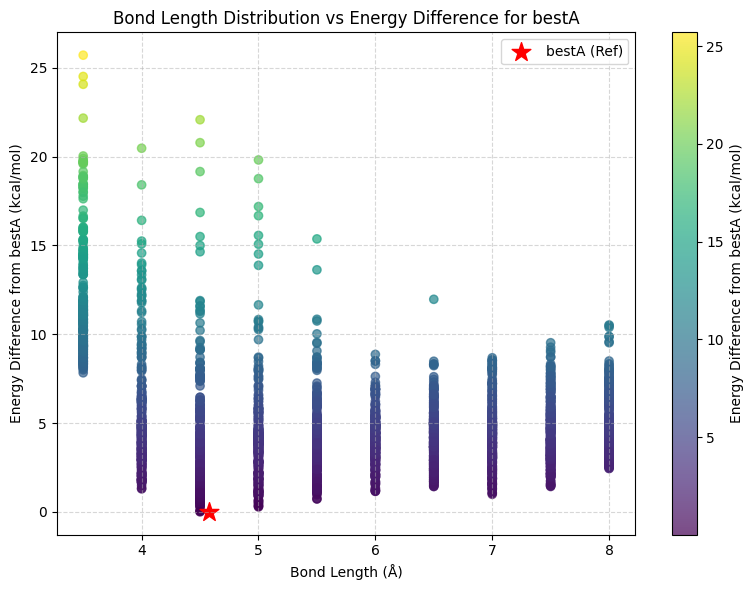

In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Define the molecule name for bestA
bestA_energy = -40.44591136
bestA_bond_length = 4.574

# Lists to store data for plotting
energy_diffs = []
bond_lengths = []
molecule_names = []

# Read energy_final_A.txt to extract bond lengths and energies
with open('energy_final_A.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        molecule_name = row[0]
        try:
            energy_a = float(row[1]) if row[1] else None
            bond_length = float(row[2].split(': ')[1]) if row[2] else None
        except (IndexError, ValueError) as e:
            print(f"Warning: Unexpected format in row: {row} ({e})")
            continue

        # Check if this molecule is bestA and set reference values if not already set
        if molecule_name == "bestA" and not bestA_found:
            bestA_energy = energy_a
            bestA_bond_length = bond_length
            bestA_found = True

        # Collect data for plotting if energy and bond length are valid
        if energy_a is not None and bond_length is not None:
            energy_diff = (energy_a - bestA_energy) * 627.5
            energy_diffs.append(energy_diff)
            bond_lengths.append(bond_length)
            molecule_names.append(molecule_name)

# Convert lists to numpy arrays for easier manipulation
energy_diffs = np.array(energy_diffs)
bond_lengths = np.array(bond_lengths)

# Create scatter plot for bond length distribution
plt.figure(figsize=(8, 6))
norm = plt.Normalize(vmin=np.min(energy_diffs), vmax=np.max(energy_diffs))
sc = plt.scatter(bond_lengths, energy_diffs, c=energy_diffs, cmap='viridis', marker='o', alpha=0.7, norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label("Energy Difference from bestA (kcal/mol)")

# Highlight bestA with a red star at zero energy difference
plt.scatter(bestA_bond_length, 0, color='red', s=200, marker='*', label='bestA (Ref)')

# Add labels and title
plt.xlabel("Bond Length (Å)")
plt.ylabel("Energy Difference from bestA (kcal/mol)")
plt.title("Bond Length Distribution vs Energy Difference for bestA")

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


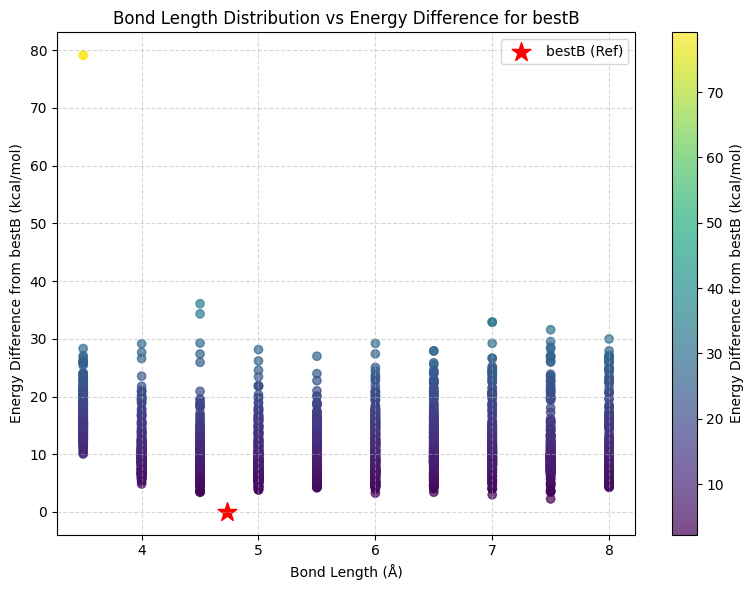

In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Define the molecule name for bestB
bestB_energy = -40.46295969
bestB_bond_length = 4.73

# Lists to store data for plotting
energy_diffs = []
bond_lengths = []
molecule_names = []

# Read energy_final_B.txt to extract bond lengths and energies
with open('energy_final_B.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        molecule_name = row[0]
        try:
            energy_b = float(row[1]) if row[1] else None
            bond_length = float(row[2].split(': ')[1]) if row[2] else None
        except (IndexError, ValueError) as e:
            print(f"Warning: Unexpected format in row: {row} ({e})")
            continue

        # Check if this molecule is bestB and set reference values if not already set
        if molecule_name == "bestB" and not bestB_found:
            bestB_energy = energy_b
            bestB_bond_length = bond_length
            bestB_found = True

        # Collect data for plotting if energy and bond length are valid
        if energy_b is not None and bond_length is not None:
            energy_diff = (energy_b - bestB_energy) * 627.5
            energy_diffs.append(energy_diff)
            bond_lengths.append(bond_length)
            molecule_names.append(molecule_name)

# Convert lists to numpy arrays for easier manipulation
energy_diffs = np.array(energy_diffs)
bond_lengths = np.array(bond_lengths)

# Create scatter plot for bond length distribution
plt.figure(figsize=(8, 6))
norm = plt.Normalize(vmin=np.min(energy_diffs), vmax=np.max(energy_diffs))
sc = plt.scatter(bond_lengths, energy_diffs, c=energy_diffs, cmap='viridis', marker='o', alpha=0.7, norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label("Energy Difference from bestB (kcal/mol)")

# Highlight bestA with a red star at zero energy difference
plt.scatter(bestB_bond_length, 0, color='red', s=200, marker='*', label='bestB (Ref)')

# Add labels and title
plt.xlabel("Bond Length (Å)")
plt.ylabel("Energy Difference from bestB (kcal/mol)")
plt.title("Bond Length Distribution vs Energy Difference for bestB")

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()



bestB - bestA (kcal/mol): -10.69782707500094


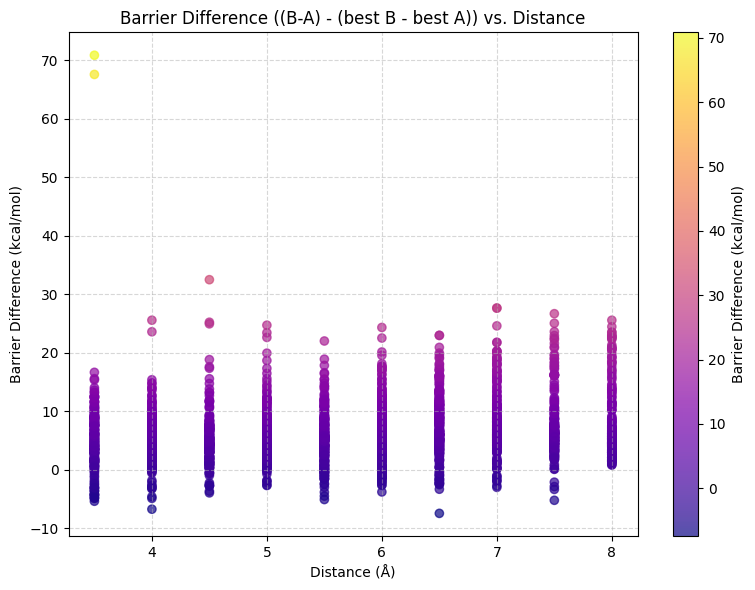

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np

bestB_minus_bestA = (bestB_energy - bestA_energy) * 627.5
print(f"bestB - bestA (kcal/mol): {bestB_minus_bestA}")

# Initialize variables to store the best (B - A) barrier difference and corresponding distance
best_barrier_diff = None
best_distance = None

# Lists to store data for plotting
barrier_diffs = []
distances = []
molecule_names = []

# Read delta_energy.csv to compute the barrier differences
with open('delta_energy.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row

    for row in reader:
        molecule_name = row[0]
        try:
            # Extract barrier_b_a and distance from respective columns
            barrier_b_a = float(row[1]) if row[1] else None  # Assuming barrier_b_a is in column 1
            distance = float(row[2]) if row[2] else None  # Assuming distance is in column 2

            # Calculate the barrier difference if both values are available
            if barrier_b_a is not None and distance is not None:
                barrier_diff = barrier_b_a - bestB_minus_bestA

                barrier_diffs.append(barrier_diff)
                distances.append(distance)
                molecule_names.append(molecule_name)

                # Track the best (B - A) value (smallest barrier difference)
                if best_barrier_diff is None or barrier_diff < best_barrier_diff:
                    best_barrier_diff = barrier_diff
                    best_distance = distance

        except (IndexError, ValueError) as e:
            print(f"Warning: Unexpected format in row: {row}. Error: {e}")

# Ensure there is at least one valid barrier difference
if not barrier_diffs:
    print("Error: No valid barrier differences were found.")
    exit()

# Convert lists to numpy arrays for easier manipulation
barrier_diffs = np.array(barrier_diffs)
distances = np.array(distances)

# Create scatter plot for the barrier differences
plt.figure(figsize=(8, 6))
norm = plt.Normalize(vmin=np.min(barrier_diffs), vmax=np.max(barrier_diffs))
sc = plt.scatter(distances, barrier_diffs, c=barrier_diffs, cmap='plasma', marker='o', alpha=0.7, norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label("Barrier Difference (kcal/mol)")

# Add labels and title
plt.xlabel("Distance (Å)")
plt.ylabel("Barrier Difference (kcal/mol)")
plt.title("Barrier Difference ((B-A) - (best B - best A)) vs. Distance")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

bestB - bestA (kcal/mol): -10.69782707500094


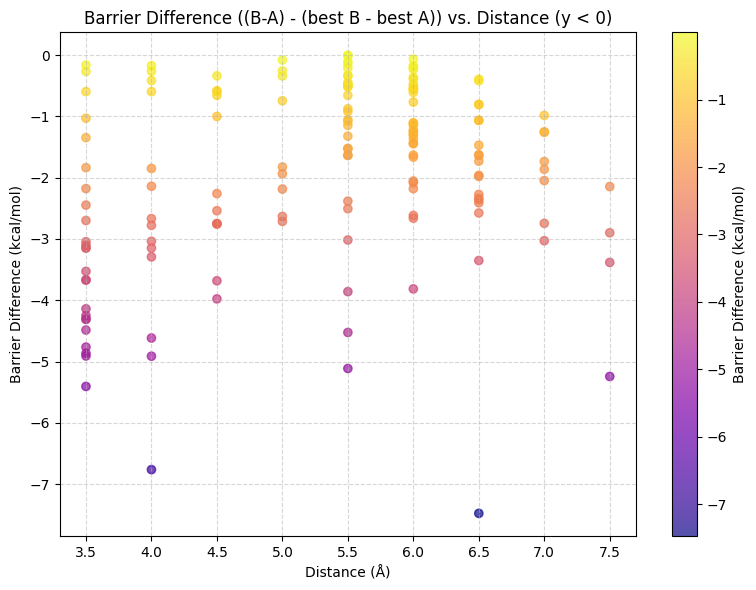

In [16]:
import csv
import matplotlib.pyplot as plt
import numpy as np

bestB_minus_bestA = (bestB_energy - bestA_energy) * 627.5
print(f"bestB - bestA (kcal/mol): {bestB_minus_bestA}")

# Initialize variables to store the best (B - A) barrier difference and corresponding distance
best_barrier_diff = None
best_distance = None

# Lists to store data for plotting
barrier_diffs = []
distances = []
molecule_names = []

# Read delta_energy.csv to compute the barrier differences
with open('delta_energy.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row

    for row in reader:
        molecule_name = row[0]
        try:
            # Extract barrier_b_a and distance from respective columns
            barrier_b_a = float(row[1]) if row[1] else None  # Assuming barrier_b_a is in column 1
            distance = float(row[2]) if row[2] else None  # Assuming distance is in column 2

            # Calculate the barrier difference if both values are available
            if barrier_b_a is not None and distance is not None:
                barrier_diff = barrier_b_a - bestB_minus_bestA

                barrier_diffs.append(barrier_diff)
                distances.append(distance)
                molecule_names.append(molecule_name)

                # Track the best (B - A) value (smallest barrier difference)
                if best_barrier_diff is None or barrier_diff < best_barrier_diff:
                    best_barrier_diff = barrier_diff
                    best_distance = distance

        except (IndexError, ValueError) as e:
            print(f"Warning: Unexpected format in row: {row}. Error: {e}")

# Ensure there is at least one valid barrier difference
if not barrier_diffs:
    print("Error: No valid barrier differences were found.")
    exit()

# Convert lists to numpy arrays for easier manipulation
barrier_diffs = np.array(barrier_diffs)
distances = np.array(distances)

# Filter to only include barrier differences less than zero
filtered_distances = distances[barrier_diffs < 0]
filtered_barrier_diffs = barrier_diffs[barrier_diffs < 0]

# Check if there are any valid points after filtering
if filtered_distances.size == 0:
    print("Error: No barrier differences less than zero were found.")
    exit()

# Create scatter plot for the barrier differences where y < 0
plt.figure(figsize=(8, 6))
norm = plt.Normalize(vmin=np.min(filtered_barrier_diffs), vmax=np.max(filtered_barrier_diffs))
sc = plt.scatter(filtered_distances, filtered_barrier_diffs, c=filtered_barrier_diffs, cmap='plasma', marker='o', alpha=0.7, norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label("Barrier Difference (kcal/mol)")

# Add labels and title
plt.xlabel("Distance (Å)")
plt.ylabel("Barrier Difference (kcal/mol)")
plt.title("Barrier Difference ((B-A) - (best B - best A)) vs. Distance (y < 0)")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


bestB - bestA (kcal/mol): -10.69782707500094


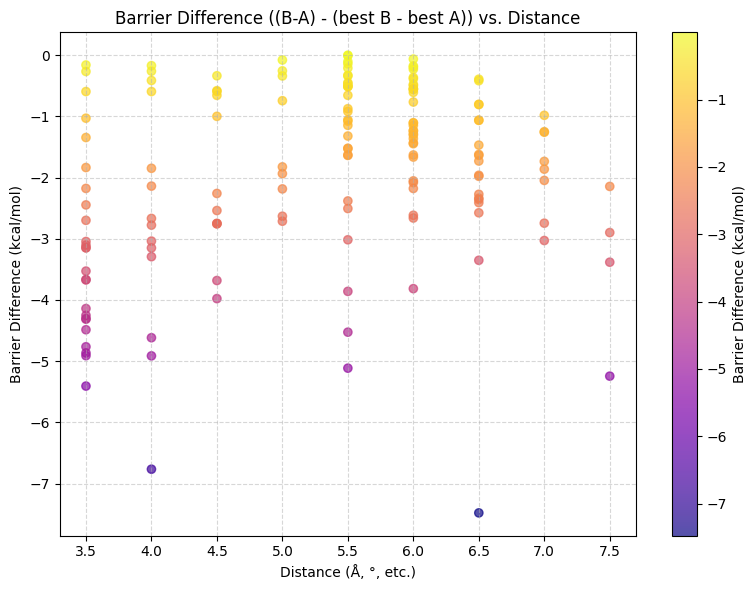

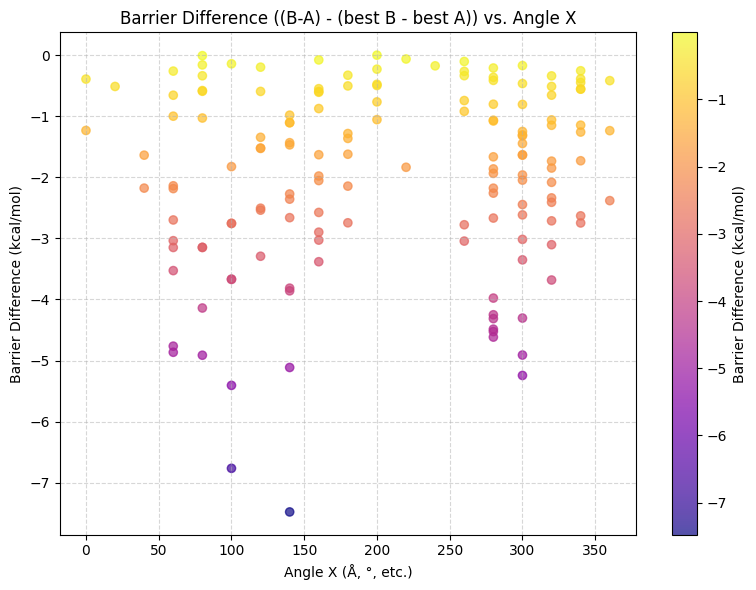

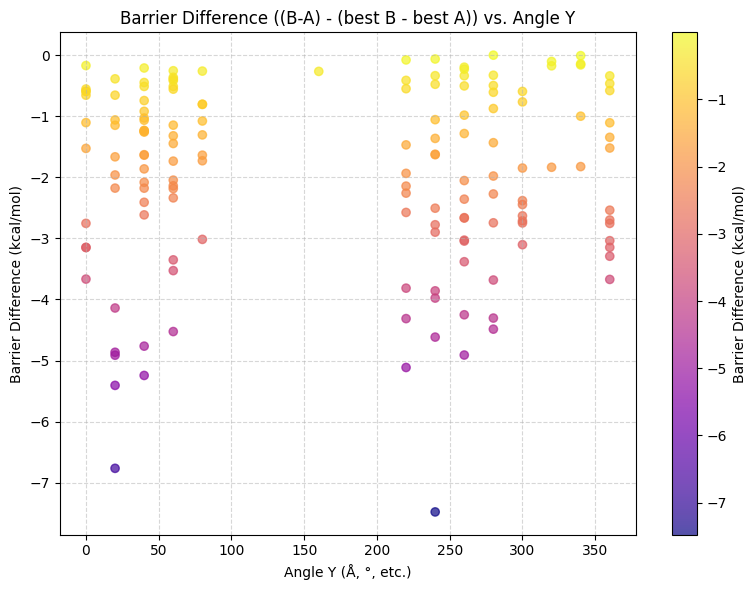

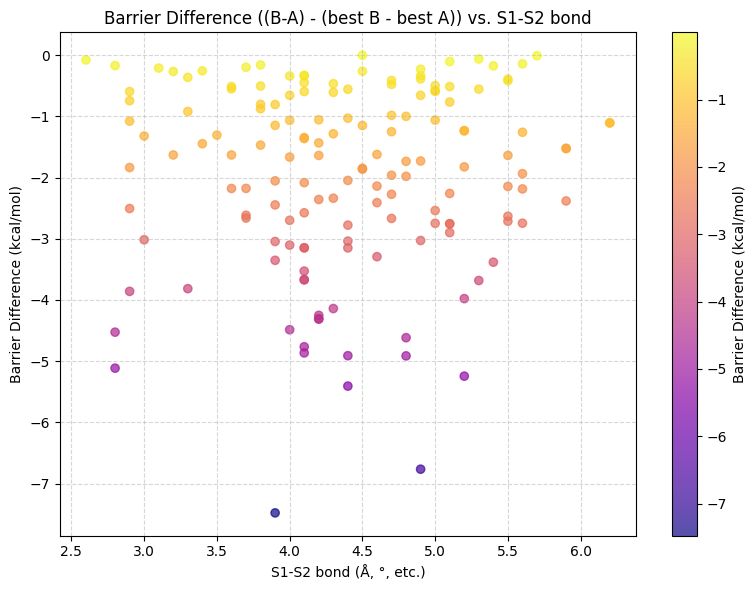

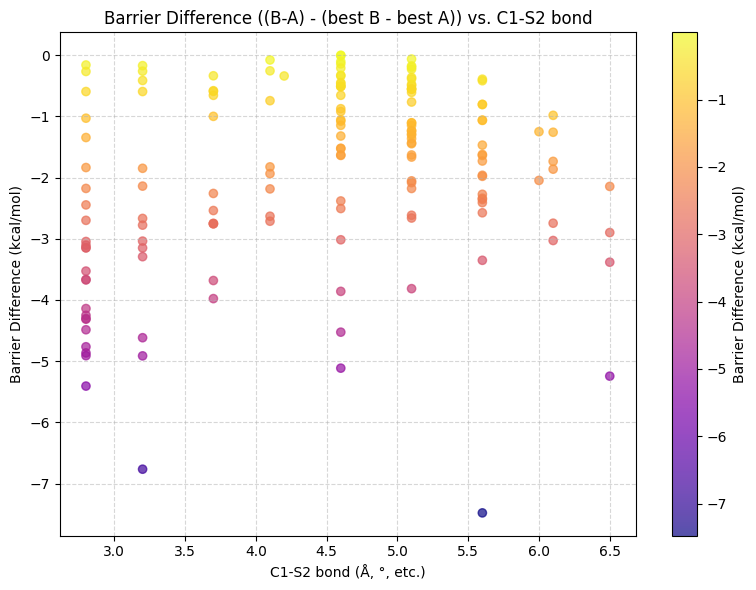

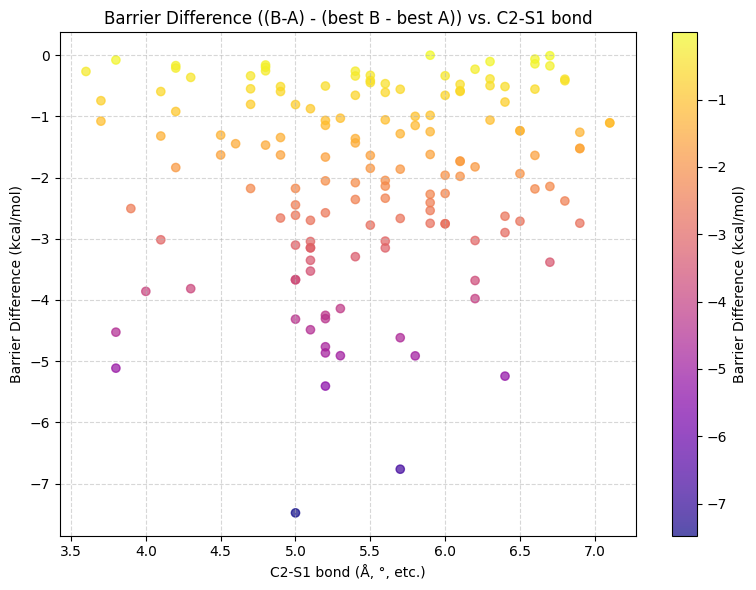

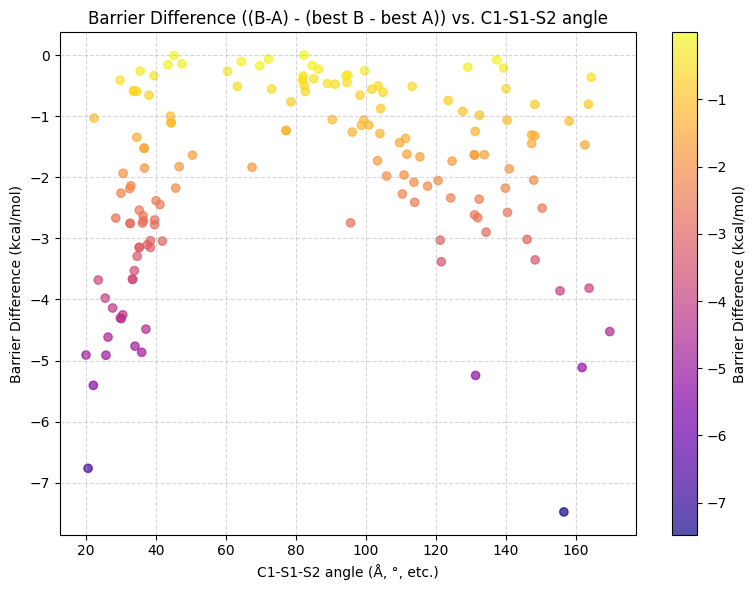

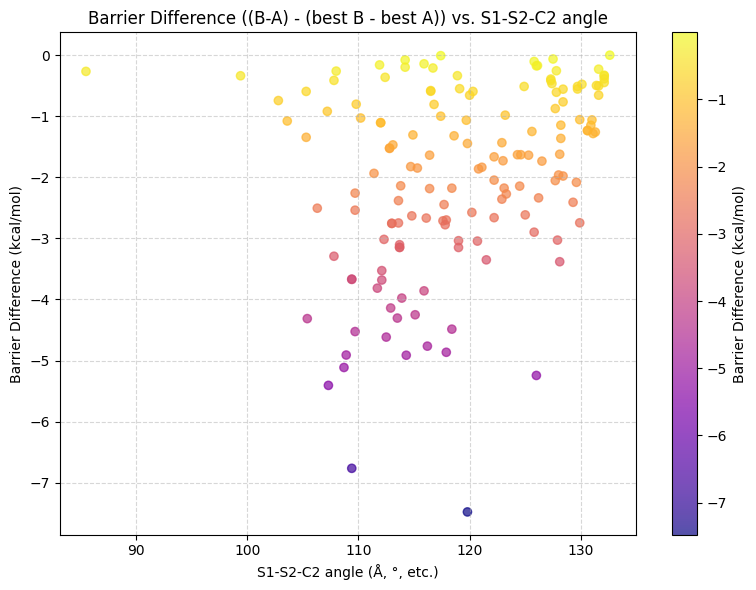

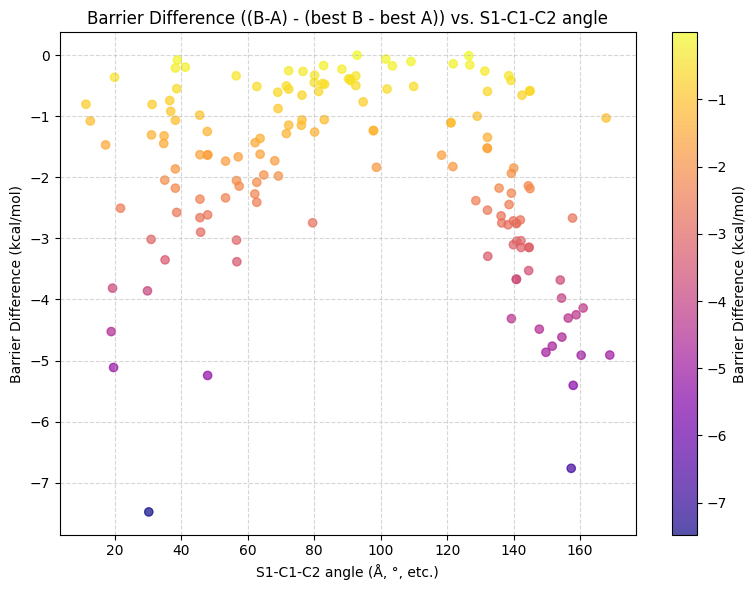

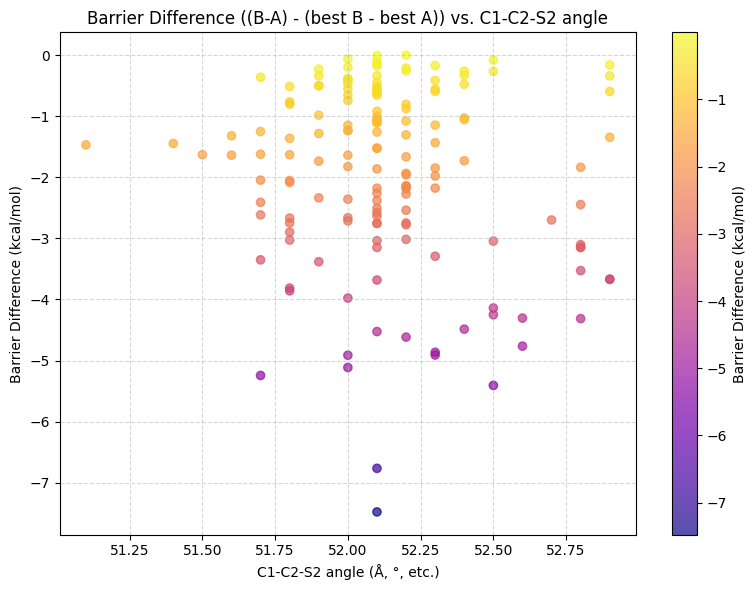

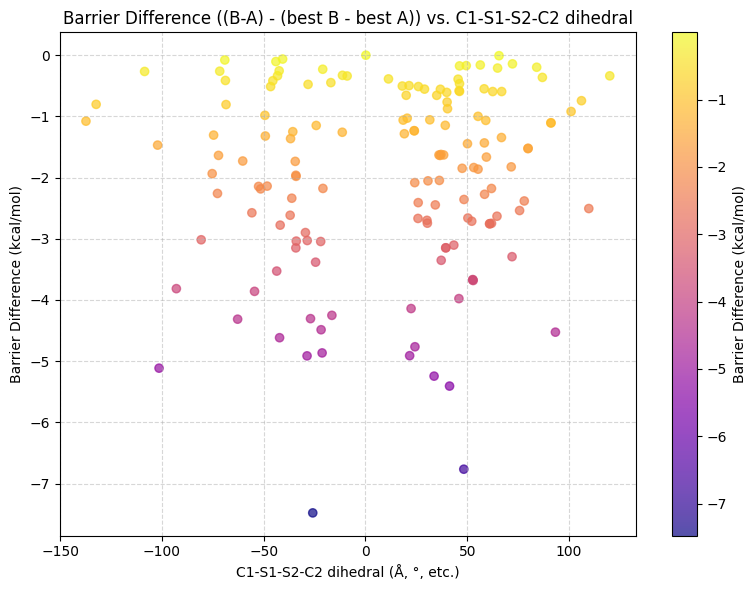

In [19]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Pre-defined best B - best A energy difference
bestB_minus_bestA = (bestB_energy - bestA_energy) * 627.5
print(f"bestB - bestA (kcal/mol): {bestB_minus_bestA}")

# Map column names to indices based on your CSV structure
column_mapping = {
    "Distance": 2,
    "Angle X": 3,
    "Angle Y": 4,
    "S1-S2 bond": 5,
    "C1-S2 bond": 6,
    "C2-S1 bond": 7,
    "C1-S1-S2 angle": 8,
    "S1-S2-C2 angle": 9,
    "S1-C1-C2 angle": 10,
    "C1-C2-S2 angle": 11,
    "C1-S1-S2-C2 dihedral": 12
}

# Read data from CSV once and store it in a list for reusability
data = []
with open('delta_energy.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row
    for row in reader:
        data.append(row)

# Loop through each physical quantity and create a plot
for selected_quantity, column_index in column_mapping.items():
    # Initialize variables to store data for plotting
    barrier_diffs = []
    values = []
    molecule_names = []

    for row in data:
        molecule_name = row[0]
        try:
            # Extract barrier_b_a and the selected physical quantity
            barrier_b_a = float(row[1]) if row[1] else None
            quantity_value = float(row[column_index]) if row[column_index] else None

            # Calculate the barrier difference if both values are available
            if barrier_b_a is not None and quantity_value is not None:
                barrier_diff = barrier_b_a - bestB_minus_bestA

                # Only keep values where the barrier difference is negative
                if barrier_diff < 0:
                    barrier_diffs.append(barrier_diff)
                    values.append(quantity_value)
                    molecule_names.append(molecule_name)

        except (IndexError, ValueError) as e:
            print(f"Warning: Unexpected format in row: {row}. Error: {e}")

    # Ensure there is at least one valid barrier difference for this quantity
    if not barrier_diffs:
        print(f"Error: No valid negative barrier differences found for {selected_quantity}.")
        continue

    # Convert lists to numpy arrays for easier manipulation
    barrier_diffs = np.array(barrier_diffs)
    values = np.array(values)

    # Create scatter plot for the current physical quantity
    plt.figure(figsize=(8, 6))
    norm = plt.Normalize(vmin=np.min(barrier_diffs), vmax=np.max(barrier_diffs))
    sc = plt.scatter(values, barrier_diffs, c=barrier_diffs, cmap='plasma', marker='o', alpha=0.7, norm=norm)
    cbar = plt.colorbar(sc)
    cbar.set_label("Barrier Difference (kcal/mol)")

    # Add labels and title
    plt.xlabel(f"{selected_quantity} (Å, °, etc.)")
    plt.ylabel("Barrier Difference (kcal/mol)")
    plt.title(f"Barrier Difference ((B-A) - (best B - best A)) vs. {selected_quantity}")

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
